## Fourier-Extension-using-OLS-and-Stochastic-Gradient-Descent

Suppose we are given the following model 
$$
y_i \approx m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)
$$

This problem can be reduced to a least squares problem of form
$$
y \approx A(\omega, K) \theta
$$
where the design matrix $A(\omega, K)$ is determined solely by the frquency parameters $\omega$ and the remaining parameters can be organized as a vector $\theta = (m, a_{1:K}, b_{1:K})$. 




\begin{equation}
	y_{1}\approx mx_{1} + \sum_{k=1}^{K}{a_{k}.sin(w_{k}x_{1})} + \sum_{k=1}^{K}{b_{k}.cos(w_{k}x_{1})}
\end{equation}
\begin{equation}
y_{2}\approx mx_{2} + \sum_{k=1}^{K}{a_{k}.sin(w_{k}x_{2})} + \sum_{k=1}^{K}{b_{k}.cos(w_{k}x_{2})}
\end{equation}
$$.$$
$$.$$
$$.$$
\begin{equation}
y_{n}\approx mx_{n} + \sum_{k=1}^{K}{a_{k}.sin(w_{k}x_{n})} + \sum_{k=1}^{K}{b_{k}.cos(w_{k}x_{n})}
\end{equation}

$$\begin{bmatrix}
y_{1}\\
y_{2}\\
.\\
.\\
.\\
y_{n} 
\end{bmatrix}=
\begin{bmatrix}
x_{1} & sin(w_{1}x_{1}) &...&sin(w_{K}x_{1})&cos(w_{1}x_{1})&...&cos(w_{K}x_{1}) \\
x_{2} & sin(w_{1}x_{2}) &...&sin(w_{K}x_{2})&cos(w_{1}x_{2})&...&cos(w_{K}x_{2}) \\
.&.&.&.&.&.&. \\
.&.&.&.&.&.&. \\
.&.&.&.&.&.&. \\
x_{n} & sin(w_{1}x_{n}) &...&sin(w_{K}x_{n})&cos(w_{1}x_{n})&...&cos(w_{K}x_{n})
\end{bmatrix}
\begin{bmatrix}
m\\
a_{1}\\
.\\
.\\
a_{K}\\
b_{1}\\
.\\
.\\
b_{K}
\end{bmatrix}
$$


\begin{equation}
	y_{n x 1}\approx A_{n x 2K+1}.x_{2K+1 x 1}
\end{equation}
\# of Features: $2K + 1$<br/>
\# of Samples: $n$<br/>
If $2K+1>n$;<br/>
Then this is the underdetermined case, otherwise overdetermined.

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from __future__ import division
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def cons_design_mat(x,w): #w list olmali
    K = len(w)
    N = len(x)
    cons = np.repeat(1,N)
    A = np.zeros(shape=(N,K*2+2))
    A[:,0]=cons
    A[:,1]=x
    for i in range(0,K):
        A[:,2*(i+1)] = np.sin(w[i] * x)
        A[:,2*(i+1)+1] = np.cos(w[i] * x)
    return(A)

In [4]:
K = 4
N = 50
a = [1,2,3,4]
b = [2,4,6,8]
w = [0.5,1 ,1.5 ,2]

np.random.seed(seed=100)
x = np.random.uniform(-10,10,100)
m = 0.2

mu = 0
v = 1
sigma = np.sqrt(v)
np.random.seed(seed=0)
eps = np.random.normal(mu, sigma, 100)

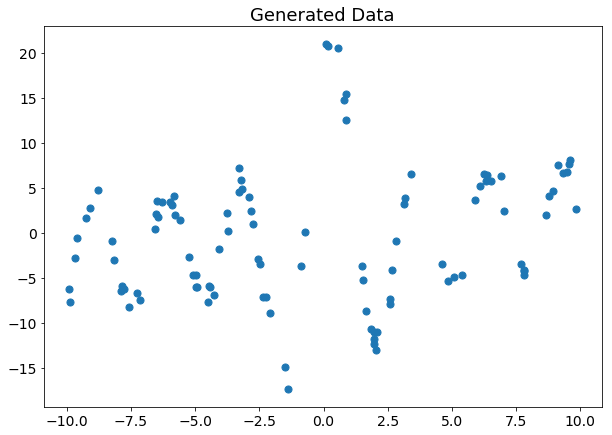

In [9]:
f1 = x
f2 = np.sin(w[0] * x)
f3 = np.sin(w[1] * x)
f4 = np.sin(w[2] * x)
f5 = np.sin(w[3] * x)
f6 = np.cos(w[0] * x)
f7 = np.cos(w[1] * x)
f8 = np.cos(w[2] * x)
f9 = np.cos(w[3] * x)

y = m*f1 + (a[0] * f2) + (a[1] * f3) + (a[2] * f4) + (a[3] * f5) \
+ (b[0] * f6) + (b[1] * f7) + (b[2] * f8) + (b[3] * f9) + eps

plt.figure(figsize = (10,7))
plt.scatter(x, y, s=50)
plt.title('Generated Data', fontsize  =18)
plt.tick_params(axis='both', labelsize = 14)
plt.show()

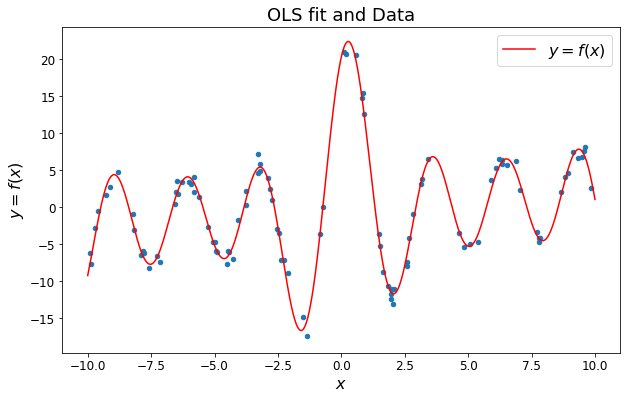

In [10]:
A = cons_design_mat(x,w)
regr = linear_model.LinearRegression()
fitt = regr.fit(A, y)
fitt.coef_
xx = np.linspace(-10,10,10000)
AA_plot = cons_design_mat(xx,w)
y_hat = fitt.predict(AA_plot)

plt.figure(figsize = (10,6))
plt.plot(xx, y_hat,color = 'r', label = '$y = f(x)$')
plt.scatter(x, y, alpha=1, s=20, )

plt.title('OLS fit and Data', fontsize = 18)
plt.xlabel('$x$', fontsize = 16) # set x-label
plt.ylabel('$y = f(x)$', fontsize = 16) # set y-label
plt.legend(fontsize = 16 )
plt.tick_params(axis='both', labelsize = 12)
plt.show()

## Evaluate and visualize the error as a function of $\omega$ only

This error can be fully visualized for $K=1$ and $K=2$.

Note that for any given $\omega$ we could run the least squares algorithm to find the best $m, \alpha, \beta$ parameters. We will denote the optimal parameters as $\theta^*(\omega) = (m, a, b)^*$. We will exhaustively evaluate the error for all $\omega$ by computing $E(\omega, \theta^*(\omega))$.

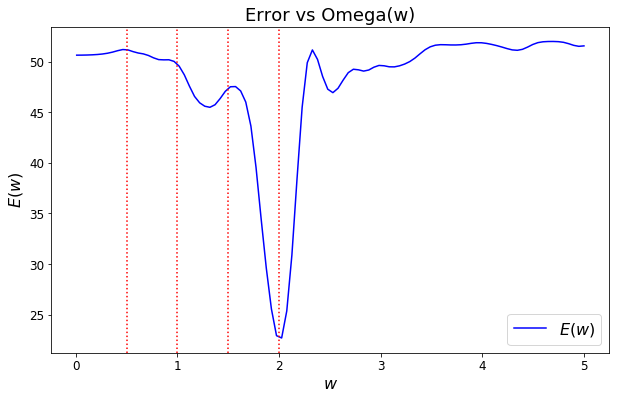

In [11]:
OM = np.linspace(0.01,5,100)
EE = np.zeros(100)
for i in range(0,100):
    ww = OM[i]
    dum_des = cons_design_mat(x,[ww])
    dum_regr = linear_model.LinearRegression()
    dum_fit = dum_regr.fit(dum_des, y)
    y_hat = dum_fit.predict(dum_des)
    EE[i] = mean_squared_error(y, y_hat)

plt.figure(figsize = (10,6))
plt.plot(OM, EE,color = 'b', label = '$E(w)$' )
for o in w:
    plt.axvline(o, color='r',ls=':')
    
plt.title('Error vs Omega(w)', fontsize = 18)
plt.xlabel('$w$', fontsize = 16) # set x-label
plt.ylabel('$E(w)$', fontsize = 16) # set y-label
plt.legend(fontsize = 16, loc='lower right')
plt.tick_params(axis='both', labelsize = 12)
plt.show()

In [12]:
OM = np.linspace(0.01,3,100)
EE = np.zeros((len(OM),len(OM)))
for i,omega1 in enumerate(OM):
    for j,omega2 in enumerate(OM):
        # Do not forget to consider rank defficient design matrix case. ????
        # Compute the errors for different omega combinations. Do not forget to consider rank defficient design matrix case.
        AA = cons_design_mat(x,[omega1,omega2])
        dum_regr = linear_model.LinearRegression()
        dum_fit = dum_regr.fit(AA, y)
        y_hat = dum_fit.predict(AA)
        EE[len(OM)-1-i,j] = mean_squared_error(y, y_hat)




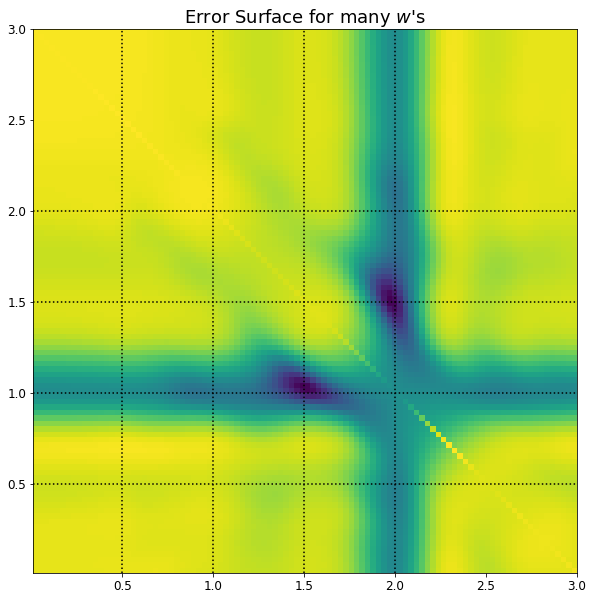

In [13]:
# These lines are for plotting purposes
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE),cmap=plt.cm.viridis, extent=(l,r,l,r), interpolation='nearest', origin='lower')
plt.title("Error Surface for many $w$'s", fontsize = 18)
plt.tick_params(axis='both', labelsize = 12)

for o in w:
    plt.axvline(o, color='black',ls=':')
    plt.axhline(o, color='black',ls=':')
    
plt.show()

## Stochastic Gradient Descent

$$
E_i(m,a,b,\omega) = \frac{1}{2}\left(y_i - \left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right)\right)^2
$$

$$
e_i = y_i - \left(m x_i + \sum_{k=1}^K a_k \sin(\omega_k x_i) + \sum_{k=1}^K b_k \cos(\omega_k x_i)\right)
$$

\begin{eqnarray}
\nabla E_i = \left(\begin{array}{c} \frac{\partial E_i}{\partial m} \\ \frac{\partial E_i}{\partial a_1} \\
\vdots \\ \frac{\partial E_i}{\partial a_K} \\  \frac{\partial E_i}{\partial b_1} \\
\vdots \\ \frac{\partial E_i}{\partial b_K} \\  \frac{\partial E_i}{\partial \omega_1} \\
\vdots \\ \frac{\partial E_i}{\partial \omega_K} 
\end{array}
\right) = 
-e_i \left(\begin{array}{c} x_i \\ \sin(\omega_1 x_i) \\ \vdots \\ \sin(\omega_K x_i) \\ 
\cos(\omega_1 x_i) \\ \vdots \\ \cos(\omega_K x_i) \\ a_1 \cos(\omega_k x_i) x_i - b_1 \sin(\omega_1 x_i) x_i \\
\vdots \\ a_K \cos(\omega_K x_i) x_i - b_K \sin(\omega_K x_i) x_i\end{array}
\right)
\end{eqnarray}

In [15]:
def model_fun(x, theta, omega): # generates y
    #creating the error term
    mu = 0
    v = 1
    sigma = np.sqrt(v)
    np.random.seed(seed=0)
    eps = np.random.normal(mu, sigma, 50)
    
    N = len(x) # number of observations
    K = len(omega) # number of frequencies
    f = len(theta) # number of parameters (m + a + b)
     
    y = np.repeat(0,N)
    y = y + ( theta[0] * x )
    
    for i in range(0,K):
        y = y + ( theta[(i+1)] * np.sin(omega[i] * x)) + (theta[(i+1)+K] * np.cos(omega[i] * x))
    
    
    return(y + eps)

def model_fun_yhat(x, theta, omega):
    if type(x) == type(np.float64(1.0)):
        N=1
    else :
        N = len(x) # number of observations
    
    K = len(omega) # number of frequencies
    f = len(theta) # number of parameters (m + a + b)
     
    y = np.repeat(0,N)
    y = y + ( theta[0] * x )
    
    for i in range(0,K):
        y = y + ( theta[(i+1)] * np.sin(omega[i] * x)) + (theta[(i+1)+K] * np.cos(omega[i] * x))
    
    return(y)

# This function returns Gradient for a single point
def grad_fun(y_i, x_i, theta, omega):
    
    K = len(omega) # number of frequencies
    f = len(theta) # number of parameters (m + a + b)
    
    len_grad = len(theta) + len(omega) 
    gradient_i = np.repeat(0,len_grad)
    
    e_i = y_i - model_fun_yhat(x_i, theta, omega) # scalar (the error coming from ith observation (y_i-y_hat))
    
    der_vec = np.repeat(0,len_grad)
    der_vec[0] = x_i
    
    for i in range(0,K):
        der_vec[i+1] = np.sin(omega[i] * x_i )
        der_vec[i+1 + K] = np.cos(omega[i] * x_i )
        der_vec[i+1 + K + K ] = ( theta[i+1] * np.cos(omega[i] * x_i ) * x_i ) \
                              - ( theta[i+1+K] * np.sin(omega[i] * x_i ) * x_i )
    
    gradient_i = -1 * e_i * der_vec 
    
    return(gradient_i)

In [16]:
def ERROR(y,y_hat):
    e = y - y_hat
    return (1/2 * sum(e**2))

### For K = 4 SGD is as follows:

The original w: [0.5, 1, 1.5, 2]
The initial w: [ 1.33157991  1.90504047  0.06029721  0.94742523]
The initial theta: [ 3.82417863 -2.44490274  9.64025981  1.92798652  7.20982558  5.28900787
  1.37995963  4.95631748  6.68882669]
The last error: 1245.65723073
The last w: [ 1.61537293  0.1952642  -1.15018063  2.00373257]
The last theta: [-0.83580738 -2.44490274  9.64025981  1.92642219  7.20982558  5.28900787
  1.37995963  4.95631748  6.68882669]


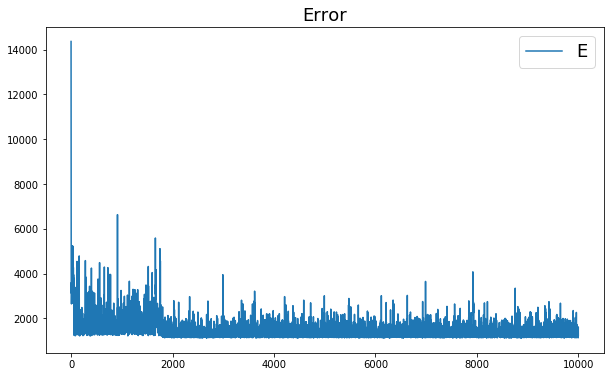

In [17]:
#%matplotlib inline
K_try = 4
# Initialize
ep = 0.0001
om = np.random.rand(K_try)*np.pi # select one of these two lines 
print("The original w: {}".format(w))
print("The initial w: {}".format(om))
#om = [0.5,1,1.5,2]
th = np.random.randn(len(om)*2+1) # select one of these two lines 
th= [0.2, 1,2,3,4,1.5,2,2.5,3] +  np.random.normal(mu, 4, 9)

print("The initial theta: {}".format(th))


ERR = []
OM_PATH = []

MAX_EPOCH = 10000
for epoch in range(MAX_EPOCH):
    # Implement SGD here
    data = np.column_stack((x,y))
    np.random.shuffle(data)
    x = data[:,0]
    y = data[:,1]
    for i in range(0,len(x)):
        x_i = x[i]
        y_i = y[i]
        grad_i = grad_fun(y_i, x_i, th, om)
        
        grad_th = grad_i[0:(2*K_try+1)]
        grad_om = grad_i[(2*K_try+1):]
        
        th = th - ep * grad_th
        om = om - ep * grad_om
        
    y_hat_dummy = model_fun_yhat(x, th, om)
    ERR.append( ERROR(y,y_hat_dummy) )
    

print("The last error: {}".format(ERR[-1]))
print("The last w: {}".format(om))
print("The last theta: {}".format(th))

plt.figure(figsize = (10,6))   
plt.plot(ERR)
plt.title('Error', fontsize = 18)
plt.legend('ERR', fontsize = 18)
plt.show()

    
    
  

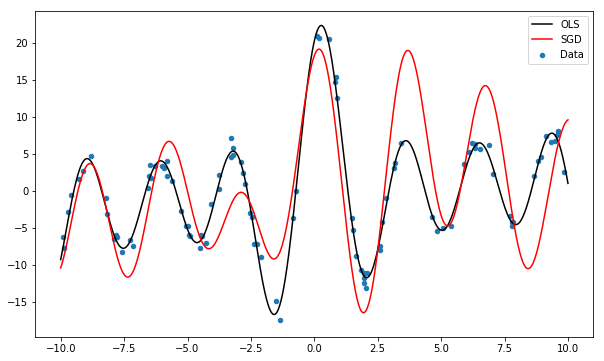

In [18]:
A = cons_design_mat(x,w)
regr = linear_model.LinearRegression()
fitt = regr.fit(A, y)


plt.figure(figsize = (10,6))
xx = np.linspace(-10,10,10000)
AA_plot = cons_design_mat(xx,w)
y_hat = fitt.predict(AA_plot)
plt.plot(xx, y_hat,color = 'black', label = 'OLS')


yy = model_fun_yhat(xx, th, om)
plt.scatter(x, y, alpha=1, s=20, label='Data' )
plt.plot(xx, yy,color = 'r', label = 'SGD')
plt.legend()
plt.show()

### For K = 2 SGD and its path is as follows:

In [ ]:
#%matplotlib inline
K_try = 2
# Initialize
ep = 0.0001
om = np.random.rand(K_try)*np.pi
om = [1.6,0.8]
th = np.random.randn(len(om)*2+1)
th = [0.13,  1.9,  1.7 ,  0.15 ,1.8]

print("The initial w: {}".format(om))
print("The initial theta: {}".format(th))
        
ERR = []
OM_PATH = []
OM_X = [om[0]]
OM_Y = [om[1]]

MAX_EPOCH = 10000
for epoch in range(MAX_EPOCH):
    data = np.column_stack((x,y))
    np.random.shuffle(data)
    x = data[:,0]
    y = data[:,1]
    for i in range(0,len(x)):
        x_i = x[i]
        y_i = y[i]
        grad_i = grad_fun(y_i, x_i, th, om)
        
        grad_th = grad_i[0:(2*K_try+1)]
        grad_om = grad_i[(2*K_try+1):]
        
        th = th - ep * grad_th
        om = om - ep * grad_om
        
    y_hat_dummy = model_fun_yhat(x, th, om)
    ERR.append( ERROR(y,y_hat_dummy) )
    OM_X.append(om[0]) 
    OM_Y.append(om[1])
    OM_PATH.append(om)
#     if np.linalg.norm(grad_i) <= 0.1:
#         break
      
    
print("The last error: {}".format(ERR[-1]))
print("The last w: {}".format(om))
print("The last theta: {}".format(th))


plt.figure(figsize = (10,6))   
plt.plot(ERR)
plt.title('Error', fontsize = 18)
plt.legend('ERR', fontsize = 18)
plt.show()
    
    

The initial w: [1.6, 0.8]
The initial theta: [0.13, 1.9, 1.7, 0.15, 1.8]


In [ ]:
l = min(OM)
r = max(OM)
plt.figure(figsize=(12,10))
plt.imshow(np.log(EE),cmap=plt.cm.viridis, extent=(l,r,l,r), interpolation='nearest', origin='lower')


for o in w:
    plt.axvline(o, color='black',ls=':')
    plt.axhline(o, color='black',ls=':')
plt.scatter(OM_X[0:10000:1], OM_Y[0:10000:1], color = 'black')
plt.title('Trajectory of Omega', fontsize = 18)
plt.show()